In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!unzip -uq "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset5.zip" -d "/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/"

In [ ]:
# example of progressively loading images from file
from keras.preprocessing.image import ImageDataGenerator
# create generator
datagen = ImageDataGenerator(rescale=1. / 255,validation_split=0.2)
img_height = 224
img_width = 224 
batch_size = 191
# prepare an iterators for each dataset
train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset5',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset5',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 786 images belonging to 10 classes.
Found 191 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import inception_v3
# Init the VGG model
vgg_conv = inception_v3.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_height, 3))

In [ ]:
# Freeze all the layers
for layer in vgg_conv.layers[:]:
    layer.trainable = False
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f88f6ffe510> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f88f70079d0> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f88b9369b90> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f88b9b2abd0> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f88b98d1a50> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f88b9878610> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f88b987cb10> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f88b987dd90> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f88b988fb10> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f88b988b250> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f88b9895210> False
<tensorflow.python.keras.layers.c

In [ ]:
from keras.models import Sequential, Model
#from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Activation, Embedding, Dense, Dropout, Flatten, Input,GlobalAveragePooling2D
from keras import activations
#from tensorflow.python.keras.layers.core import Dense, Dropout, Flatten
#from tensorflow.python.keras.layers import Input
from keras.optimizers import Adam, SGD
from keras.layers import LSTM
#from keras.layers import Dropout
#from keras.applications.vgg16 import VGG16
#from tensorflow.keras.applications import vgg16
from skimage.color import gray2rgb
#from tensorflow.keras.applications.inception_v3 import InceptionV3 
#from tensorflow.keras.applications import DenseNet201

In [ ]:
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg_conv)

# Add new layers
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 51200)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              52429824  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10250     
Total params: 74,242,858
Trainable params: 52,440,074
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
train_it.samples

786

In [ ]:
import keras
initial_learning_rate = 0.001
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=2000,
    decay_rate=0.16,
    staircase=True)
#sgd = keras.optimizers.SGD(lr=0.00001, decay=1e-6, momentum=0.9, nesterov=True)
#model.compile(loss='categorical_crossentropy',
#              optimizer=keras.optimizers.SGD(learning_rate=lr_schedule),
#              metrics=['acc'])
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=['acc'])

In [ ]:
nb_epochs = 70
batch_size = 191
model.fit_generator(
    train_it,
    steps_per_epoch = train_it.samples // batch_size,
    validation_data = val_it, 
    validation_steps = val_it.samples // batch_size,
    epochs = nb_epochs)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70


ValueError: ignored

In [ ]:
model.save("/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_5_inception")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/Dataset_5_inception/assets


In [ ]:
val_it.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9], dtype=int32)

In [ ]:
batch_size = 191
# prepare an iterators for each dataset
#train_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset3/dataset',target_size=(img_height, img_width),batch_size = batch_size, subset='training')
val_it = datagen.flow_from_directory('/content/drive/MyDrive/Research and Project Stuffs/BdSL/Datasets/dataset5',target_size=(img_height, img_width), batch_size = batch_size, subset='validation')

Found 191 images belonging to 10 classes.


In [ ]:
test_score = model.evaluate_generator(val_it, batch_size)



print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 

print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[INFO] accuracy: 41.36%
[INFO] Loss:  1.8434163331985474


In [ ]:
import sys

import numpy as np

from keras import backend as K

from keras.models import Sequential

from keras.layers.core import Dense, Dropout, Activation, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, confusion_matrix

from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input

import matplotlib.pyplot as plt

from keras.optimizers import Adam

import itertools 

In [ ]:
# Loss Curves

plt.figure(figsize=[8,6])

plt.plot(model.history['loss'],'r',linewidth=3.0)

plt.plot(model.history['val_loss'],'b',linewidth=3.0)

plt.legend(['Training loss', 'Validation Loss'],fontsize=18)

plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Loss',fontsize=16)

plt.title('Loss Curves',fontsize=16)

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False



def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):

    """

    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.

    """

    plt.figure(figsize=(10,10))



    plt.imshow(cm, interpolation='nearest', cmap=cmap)

    plt.title(title)

    plt.colorbar()



    tick_marks = np.arange(len(classes))

    plt.xticks(tick_marks, classes, rotation=45)

    plt.yticks(tick_marks, classes)



    if normalize:

        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        cm = np.around(cm, decimals=2)

        cm[np.isnan(cm)] = 0.0

        print("Normalized confusion matrix")

    else:

        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

        plt.text(j, i, cm[i, j],

                 horizontalalignment="center",

                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')

    plt.xlabel('Predicted label')

In [ ]:
y_img_batch, y_class_batch = val_it[0]
y_pred = np.argmax(model.predict(y_img_batch),-1)
y_true = np.argmax(y_class_batch,-1)
print(sum(y_pred==y_true)/batch_size)

0.41361256544502617


In [ ]:
#Print the Target names



target_names = []

for key in val_it.class_indices:

    target_names.append(key)



print(target_names)

['a', 'dh', 'e', 'ga', 'i', 'k', 'kh', 'o', 'oo', 'u']


Normalized confusion matrix


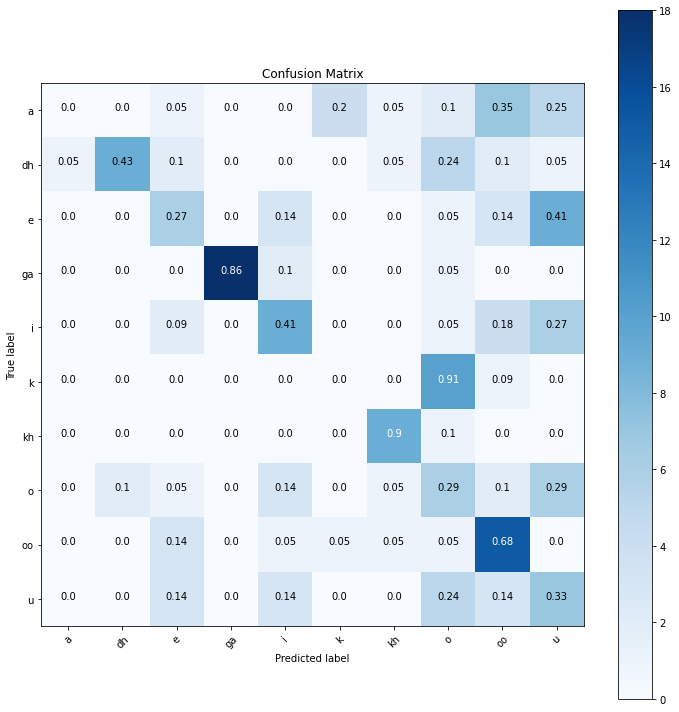

In [ ]:
cm = confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report

print('Classification Report')

print(classification_report(y_true, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

           a       0.00      0.00      0.00        20
          dh       0.82      0.43      0.56        21
           e       0.33      0.27      0.30        22
          ga       1.00      0.86      0.92        21
           i       0.43      0.41      0.42        22
           k       0.00      0.00      0.00        11
          kh       0.69      0.90      0.78        10
           o       0.18      0.29      0.22        21
          oo       0.41      0.68      0.51        22
           u       0.21      0.33      0.25        21

    accuracy                           0.41       191
   macro avg       0.41      0.42      0.40       191
weighted avg       0.41      0.41      0.40       191

